In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

## Нормальная выборка

$X_1, ..., X_n \sim \mathcal{N}(\theta, 1)$

$H_0: \theta = \theta_0$

$H_1: \theta > \theta_0$

$\left\{\sum\limits_{i=1}^n X_i \geqslant c_{\alpha}\right\}$ --- критерий, где $c_{\alpha}$ --- $(1-\alpha)$-квантиль $\mathcal{N}(n\theta_0, n)$

Построим критерий для заданных ниже значений. Функция `ppf` считает квантили.

In [102]:
theta0 = 0
size = 100  # размер выборки
alpha = 0.05  # уровень значимости
c_alpha = sps.norm(size * theta0, size).ppf(1 - alpha)
print('Критерий: {sample_sum >= %.2f}' % c_alpha)

Критерий: {sample_sum >= 164.49}


Проверим гипотезу при истинном значении $\theta$ равным 0, 1 и 2. В первых двух случаях основная гипотеза не отвергается. В последнем случае отвергается.

In [115]:
for theta in [0, 1, 2]:
    sample = sps.norm(theta, 1).rvs(size=size)
    print('theta = %d: sample_sum = %.2f' % (theta, sample.sum()))

theta = 0: sample_sum = 1.82
theta = 1: sample_sum = 80.39
theta = 2: sample_sum = 186.29


### `p-value`

Сгенерируем выборку при 1). справедливости основной гипотезы; 2). при справедливости альтернативы. Для каждого случая посчитаем `p-value` для данной реализации выборки. Поскольку критерий правосторонний, то `p-value` считается через функцию `sf`, которая есть 1 - функция распределения. `p-value` есть площадь закрашенной области.

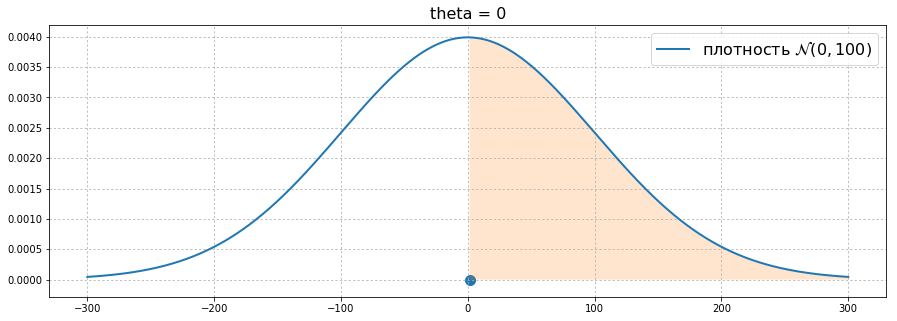

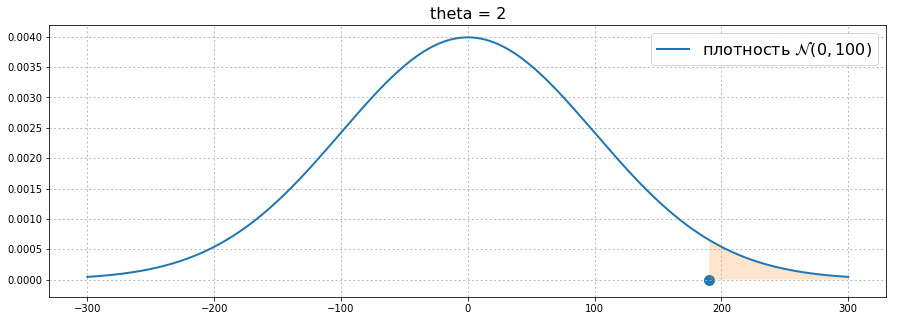

In [139]:
theta0 = 0  # истинное значение параметра
size = 100  # размер выборки

for theta in [0, 2]:
    sample = sps.norm(theta, 1).rvs(size=size)
    p_value = sps.norm(size * theta0, size).sf(sample.sum())

    grid = np.linspace(-300, 300, 1000)
    plt.figure(figsize=(15, 5))
    plt.plot(grid, sps.norm(size * theta0, size).pdf(grid), lw=2, 
             label='плотность $\mathcal{N}(%.d, %d)$' % (size * theta0, size))
    plt.scatter(sample.sum(), 0, s=100)
    right_grid = np.linspace(sample.sum(), 300, 1000)
    plt.fill_between(right_grid, sps.norm(size * theta0, size).pdf(right_grid), 
                     np.zeros_like(right_grid), alpha=0.2)
    plt.grid(ls=':')
    plt.title('theta = %d' % theta, fontsize=16)
    plt.legend(fontsize=16)
    plt.show()

## Экспоненциальная выборка

$X_1, ..., X_n \sim Exp(\theta)$

$H_0: \theta = 1$

$H_1: \theta = 2$

$\left\{\sum\limits_{i=1}^n X_i \leqslant c_{\alpha}\right\}$ --- критерий, где $c_{\alpha}$ --- $\alpha$-квантиль $\Gamma(\theta_0, n)$

Построим критерий для заданных ниже значений. Функция `ppf` считает квантили.

In [120]:
theta0 = 1
size = 100  # размер выборки
alpha = 0.05  # уровень значимости
c_alpha = sps.gamma(a=size, scale=1/theta0).ppf(alpha)
print('Критерий: {sample_sum <= %.2f}' % c_alpha)

Критерий: {sample_sum <= 84.14}


Проверим гипотезу при истинном значении $\theta$ равным 1, 1.01 и 2. В первых двух случаях основная гипотеза не отвергается. В последнем случае отвергается.

In [127]:
for theta in [1, 1.01, 2]:
    sample = sps.expon(scale=1/theta).rvs(size=size)
    print('theta = %.2f: sample_sum = %.2f' % (theta, sample.sum()))

theta = 1.00: sample_sum = 108.63
theta = 1.01: sample_sum = 99.66
theta = 2.00: sample_sum = 41.75


Теперь построим критерий для выборки в 100 раз больше.

In [130]:
theta0 = 1
size = 10000  # размер выборки
alpha = 0.05  # уровень значимости
c_alpha = sps.gamma(a=size, scale=1/theta0).ppf(alpha)
print('Критерий: {sample_sum <= %.2f}' % c_alpha)

Критерий: {sample_sum <= 9836.09}


При такой выборке во втором случае мы уже можем отвергнуть основную гипотезу.

In [134]:
for theta in [1, 1.01, 2]:
    sample = sps.expon(scale=1/theta).rvs(size=size)
    print('theta = %.2f: sample_sum = %.2f' % (theta, sample.sum()))

theta = 1.00: sample_sum = 10226.56
theta = 1.01: sample_sum = 9754.16
theta = 2.00: sample_sum = 5033.61


Таким образом, на практике даже если "почти" справедлива основная гипотеза, то есть допустимы незначительные отклонения от нее (например, погрешности), то при достаточно большом размере выборки основная гипотеза будет отвергнута. В то же время, если выборка слишком мала, то основная гипотеза почти никогда не будет отвергнута --- слишком велик риск допустить ошибку первого рода.

### `p-value`

Сгенерируем выборку при 1). справедливости основной гипотезы; 2). при справедливости альтернативы. Для каждого случая посчитаем `p-value` для данной реализации выборки. Поскольку критерий левосторонний, то `p-value` считается через функцию `cdf`, которая функция распределения. `p-value` есть площадь закрашенной области. В данном случае плотность гамма-распределения визуально похожа на плотность нормального распределения, но это только с первого взгляда.

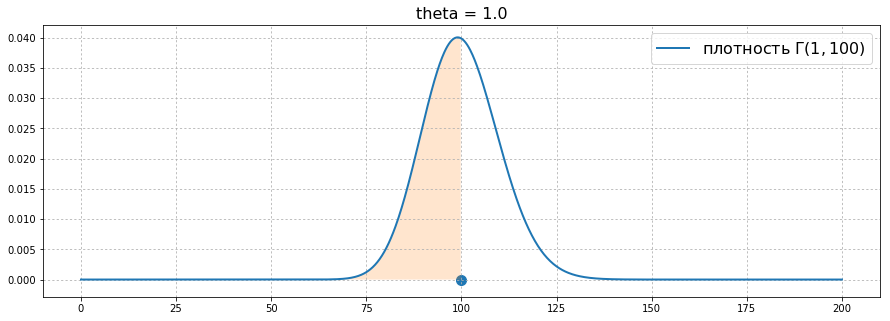

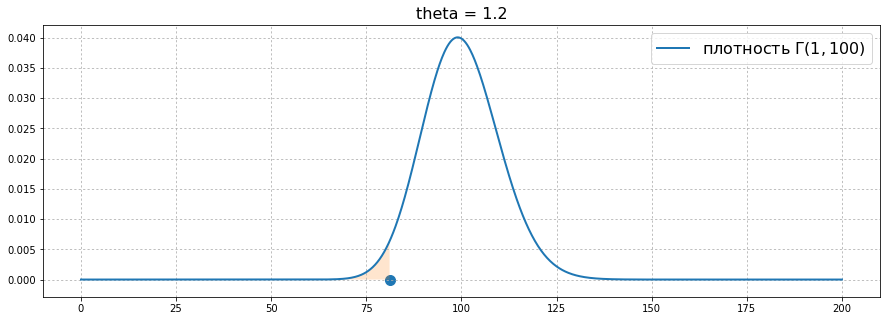

In [143]:
theta0 = 1  # истинное значение параметра
size = 100  # размер выборки

for theta in [1, 1.2]:
    sample = sps.expon(scale=1/theta).rvs(size=size)
    p_value = sps.gamma(a=size, scale=1/theta0).cdf(sample.cumsum())

    grid = np.linspace(0, 200, 1000)
    plt.figure(figsize=(15, 5))
    plt.plot(grid, sps.gamma(a=size, scale=1/theta0).pdf(grid), lw=2,
             label='плотность $\Gamma(%.d, %d)$' % (theta0, size))
    plt.scatter(sample.sum(), 0, s=100)
    right_grid = np.linspace(0, sample.sum(), 1000)
    plt.fill_between(right_grid, sps.gamma(a=size, scale=1/theta0).pdf(right_grid), 
                     np.zeros_like(right_grid), alpha=0.2)
    plt.grid(ls=':')
    plt.title('theta = %.1f' % theta, fontsize=16)
    plt.legend(fontsize=16)
    plt.show()

Посмотрим, как меняется значение `p-value` в зависимости от размера выборки из истинного распределения.

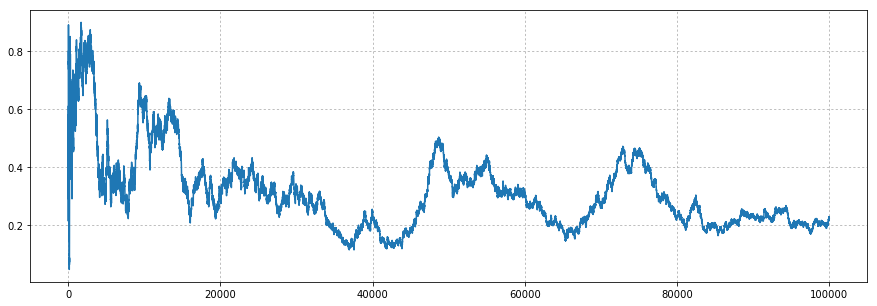

In [37]:
size = 100000
sample = sps.expon(scale=1/theta0).rvs(size=size)
p_value = sps.gamma(a=np.arange(size)+1, scale=1/theta0).cdf(sample.cumsum())

plt.figure(figsize=(15, 5))
plt.plot(p_value)
plt.grid(ls=':')
plt.show()

При небольшом изменении параметра, из которого генерируется выборка, значение `p-value` при большом значении выборки может быть очень маленьким.

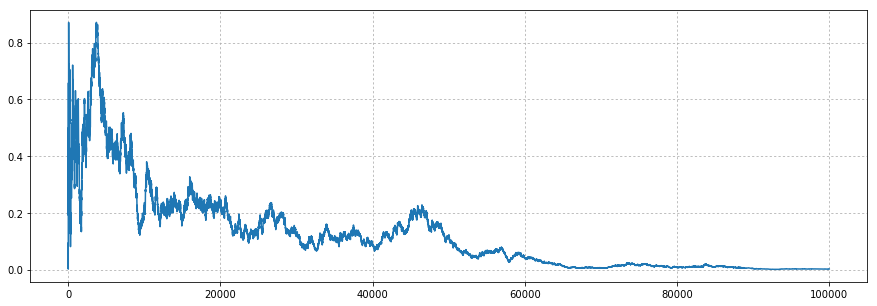

In [41]:
size = 100000
sample = sps.expon(scale=1/(theta0 + 0.01)).rvs(size=size)
p_value = sps.gamma(a=np.arange(size)+1, scale=1/theta0).cdf(sample.cumsum())

plt.figure(figsize=(15, 5))
plt.plot(p_value)
plt.grid(ls=':')
plt.show()

Если параметр сильно отличается, то значение `p-value` уже при малой выборки будет близко к нулю.

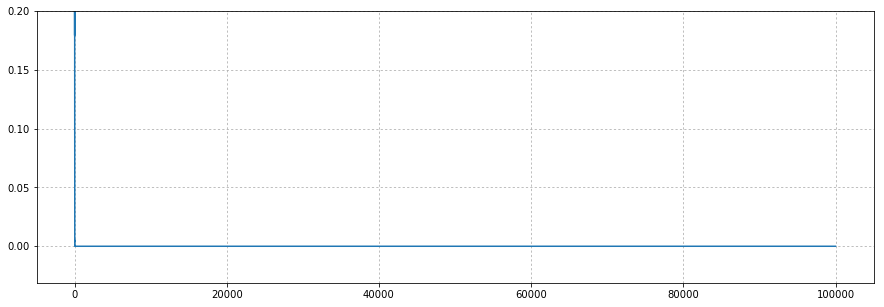

In [144]:
size = 100000
theta1 = 2
sample = sps.expon(scale=1/theta1).rvs(size=size)
p_value = sps.gamma(a=np.arange(size)+1, scale=1/theta0).cdf(sample.cumsum())

plt.figure(figsize=(15, 5))
plt.plot(p_value)
plt.grid(ls=':')
plt.ylim((None, 0.2))
plt.show()

Если параметр сильно отличается от $\theta_0$ в "другую" сторону, то значение `p-value` будет велико.

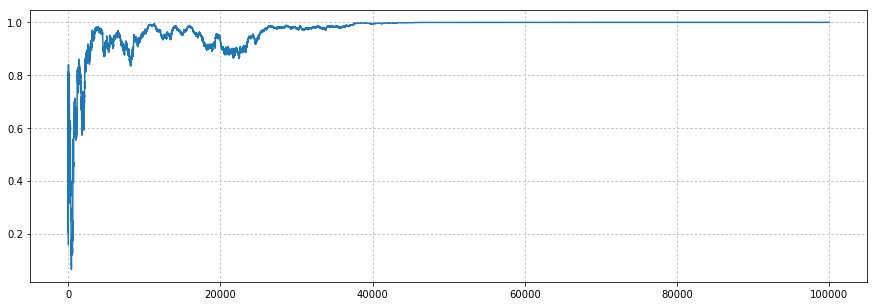

In [43]:
size = 100000
sample = sps.expon(scale=1/(theta0 - 0.01)).rvs(size=size)
p_value = sps.gamma(a=np.arange(size)+1, scale=1/theta0).cdf(sample.cumsum())

plt.figure(figsize=(15, 5))
plt.plot(p_value)
plt.grid(ls=':')
plt.show()

Если же справедлива основная гипотеза, то $p(X)$ (то есть `p-value` с подставленной в нее выборкой) имеет равномерное распределение на $[0, 1]$ при любом размере выборки. Это видно из гистограмм, которые быи получены путем многократного моделирования выборки при справедливости основной гипотезы. Данный факт говорит о том, что большие значения `p-value` не являются основанием для "принятия" основной гипотезы.

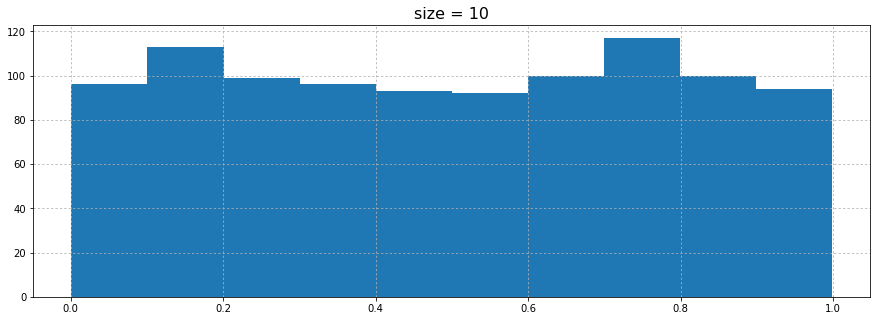

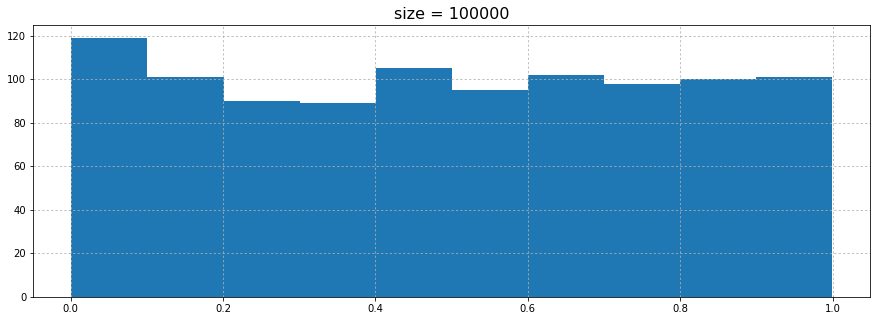

In [145]:
N = 1000

for size in [10, 100000]:
    sample = sps.expon(scale=1/theta0).rvs(size=(N, size))
    p_value = sps.gamma(a=size, scale=1/theta0).cdf(sample.sum(axis=1))

    plt.figure(figsize=(15, 5))
    plt.hist(p_value)
    plt.grid(ls=':')
    plt.title('size = %.d' % size, fontsize=16)
    plt.show()

## Байесовский подход к проверке гипотез

$H_0: \mathsf{P} \in \mathcal{P}_0 \text{, где } \mathcal{P}_0 = \left\{\left. \mathsf{P}^0_\theta\ \right|\ \theta \in \Theta\right\} \text{, причем плотность } \mathsf{P}^0_\theta \text{ равна } p^0_\theta(X).$

$H_1: \mathsf{P} \in \mathcal{P}_1 \text{, где } \mathcal{P}_1 = \left\{\left. \mathsf{P}^1_\sigma\ \right|\ \sigma \in \Sigma\right\} \text{, причем плотность } \mathsf{P}^1_\sigma \text{ равна } p^1_\sigma(X).$

Пусть $\left\{ q^0(\theta) \right\}$ и $\left\{ q^1(\sigma) \right\}$ --- семейства априорных распределений для параметров $\theta$ и $\sigma$ соответственно.

Статистика критерия
$$K(X) = \frac{\mathsf{P}(\left. \mathcal{P}_0 \right| X)}{\mathsf{P}(\left. \mathcal{P}_1 \right| X)} = \frac{\int\limits_\Theta p^0_\theta(X) q^0(\theta) d\theta}{\int\limits_\Sigma p^1_\sigma(X) q^1(\sigma) d\sigma}$$

Можно заметить, что числитель и знаменатель равны соответственно $p^0(X)$ и $p^1(X)$, которые называются обоснованностью (evidence). Их отношение показывает, насколько одна модель описывает данные лучше другой модели.

**Пример**

$H_0: \mathsf{P} \in \mathcal{P}_0 \text{, где } \mathcal{P}_0 = \left\{\left. \mathcal{N}(0, \theta^{-1})\ \right|\ \theta > 0\right\}$

$H_1: \mathsf{P} \in \mathcal{P}_1 \text{, где } \mathcal{P}_1 = \left\{\left. Lapl(\sigma)\ \right|\ \sigma > 0\right\} \text{ причем } p^1_\sigma(x) = \frac{\sigma}{2} e^{-\sigma |x|}$

В качестве априорных распределений на $\theta$ и $\sigma$ возьмем соответственно распределения $\Gamma(\alpha, \beta)$ и $\Gamma(\gamma, \delta)$. Сопряженными будут $\Gamma\left(\alpha + \frac12 \sum X_i^2, \beta + n/2\right)$ и $\Gamma\left(\alpha + \sum \left|X_i\right|, \beta + n\right)$. Для каждой модели посчитаем обоснованность.

$$p^0(X) = \int\limits_\Theta p^0_\theta(X) q^0(\theta) d\theta =  \int\limits_0^{+\infty} \frac{1}{(2\pi)^{n/2}} \theta^{n/2} e^{-\frac{\theta}{2} \sum X_i^2} \cdot \frac{\alpha^\beta \theta^{\beta-1}}{\Gamma(\beta)}e^{-\alpha\theta} d\theta = $$
$$ = \frac{\alpha^\beta}{(2\pi)^{n/2}\Gamma(\beta)} \int\limits_0^{+\infty} \theta^{n/2 + \beta-1} e^{-\theta \left(\alpha + \frac{1}{2} \sum X_i^2\right)} d\theta = \frac{\alpha^\beta}{(2\pi)^{n/2}\Gamma(\beta)} \frac{\Gamma(n/2 + \beta)}{\left(\alpha + \frac{1}{2} \sum X_i^2\right)^{n/2 + \beta}}$$


$$p^1(X) = \int\limits_\Sigma p^1_\sigma(X) q^1(\sigma) d\sigma = \int\limits_0^{+\infty} \frac{\sigma^n}{2^n} e^{-\sigma \sum \left|X_i\right|} \cdot \frac{\gamma^\delta \sigma^{\delta-1}}{\Gamma(\delta)}e^{-\gamma\sigma} d\sigma = $$
$$ = \frac{\gamma^\delta}{2^n\Gamma(\delta)} \int\limits_0^{+\infty} \sigma^{n + \delta-1} e^{-\sigma \left(\gamma + \sum \left|X_i\right|\right)} d\sigma = \frac{\gamma^\delta}{2^n\Gamma(\delta)} \frac{\Gamma(n + \delta)}{\left(\gamma + \sum \left|X_i\right|\right)^{n + \delta}}$$

В обоих случаях под интегралом с точностью до константы записана плотность апостериорного распределения, поэтому интеграл равен обратной величине к нормировочной константе этого распределения.

Далее можно проверять гипотезу по значению статистики $K(X)$ (см. лекции).